In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "",
                             database = "ecommerce")

cur = db.cursor()

# List all unique cities where customers are located. 

In [3]:
query="""select distinct(customer_city) from customers"""

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017. 

In [4]:
query="""SELECT count(order_id) FROM `orders` where YEAR(order_purchase_timestamp) = 2017"""

cur.execute(query)

data = cur.fetchall()

"orders placed in 2017",data[0][0]

('orders placed in 2017', 135303)

# Find the total sales per category. 

In [7]:
query="""SELECT UPPER(p.product_category),round(sum(pa.payment_value),2) FROM `products` p join order_items o on p.product_id = o.product_id join payments pa on o.order_id = pa.order_id GROUP by  p.product_category"""

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data,columns= ["product_category","Sales"])

df

,product_category,Sales
0,None,252801.71
1,AGRO INDUSTRIA E COMERCIO,118730.61
2,ART,30992.93
3,ARTS AND CRAFTS,2326.17
4,AUDIO,60324.62
...,...,...
69,STATIONARY STORE,317440.07
70,TECHNICAL BOOKS,24915.44
71,TELEPHONY,486882.05
72,TOYS,619037.69


# Calculate the percentage of orders that were paid in installments. 

In [11]:
query="""SELECT (sum(case when payment_installments >= 1 then 1 else 0 end)/ count(*))*100 from payments  """

cur.execute(query)

data = cur.fetchall()

"The percentage of orders that were paid in installments",data[0][0]


('orders that were paid in installments', Decimal('99.9981'))

# Count the number of customers from each state. 

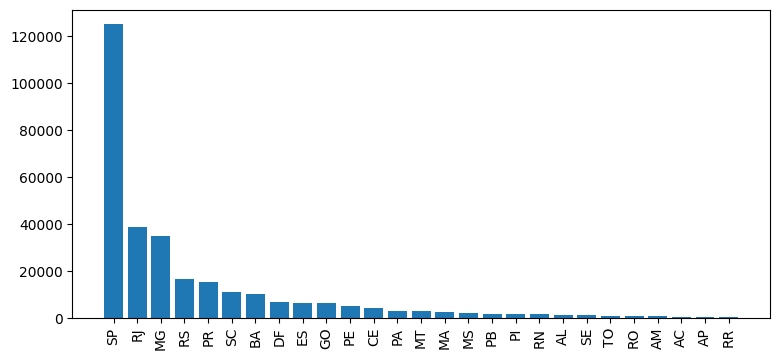

In [25]:
query="""select customer_state, count(*) as count from customers group by customer_state """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns= ["state","customer_count"])

df = df.sort_values(by = "customer_count", ascending = False)

plt.figure(figsize = (9,4))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)

plt.show()